# Physics 21, Spring 2020
## Assignment 4a: Bayesian Analysis

In [53]:
from matplotlib import pyplot as pl
import numpy as np
from math import factorial
import copy

# Part 1

In [54]:
def tossNCoins(H, n):
    return np.random.choice(['H', 'T'], size = n, p = [H, 1-H])

def pDgivenH(trials, H):
    n = len(trials)
    h = sum(trials == 'H')
    pD = factorial(n) / (factorial(h) * factorial(n-h))
    pD *= H ** h * (1-H) ** (n-h)
    return pD

In [55]:
tossNCoins(0.5, 5), pDgivenH(tossNCoins(0.5, 100), 0)

(array(['H', 'H', 'T', 'T', 'H'], dtype='<U1'), 0.0)

## Uniform Prior

In [81]:
gridSize = 1000
dH = 1 / gridSize

Hseq = np.linspace(0, 1, gridSize)
prior = np.ones_like(Hseq) # uniform prior
prior /= (sum(prior) * dH) # normalize
posterior = np.zeros_like(Hseq)

In [82]:
sum(prior * dH)

1.0000000000000007

<IPython.core.display.Javascript object>


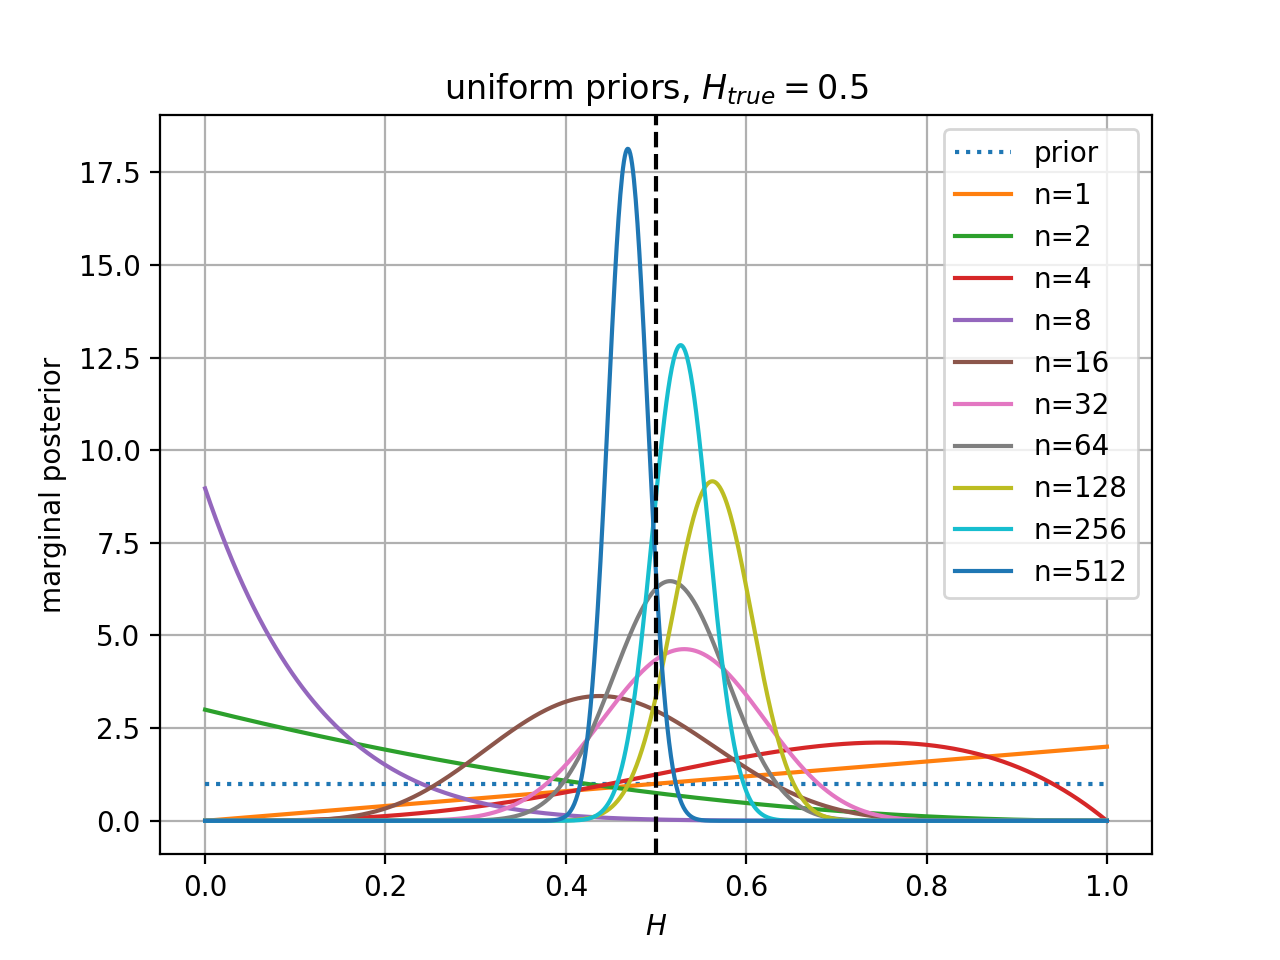

In [83]:
%matplotlib notebook
pl.plot(Hseq, prior, label = "prior", linestyle = ":")
n = 1
Htrue = 0.5
while n <= 512:

    trials = tossNCoins(Htrue, n)

    for i, H in enumerate(Hseq):
        posterior[i] = pDgivenH(trials, H) * prior[i]

    posterior /= (sum(posterior) * dH) # normalize
    
    pl.plot(Hseq, posterior, label = f"n={n}")
    n *= 2
    
pl.grid()
pl.legend()
pl.xlabel(r"$H$")
pl.ylabel(r"marginal posterior")
pl.title(r"uniform priors, $H_{true} = 0.5$")
pl.axvline(x = Htrue, linestyle = "--", color = "black")

<IPython.core.display.Javascript object>


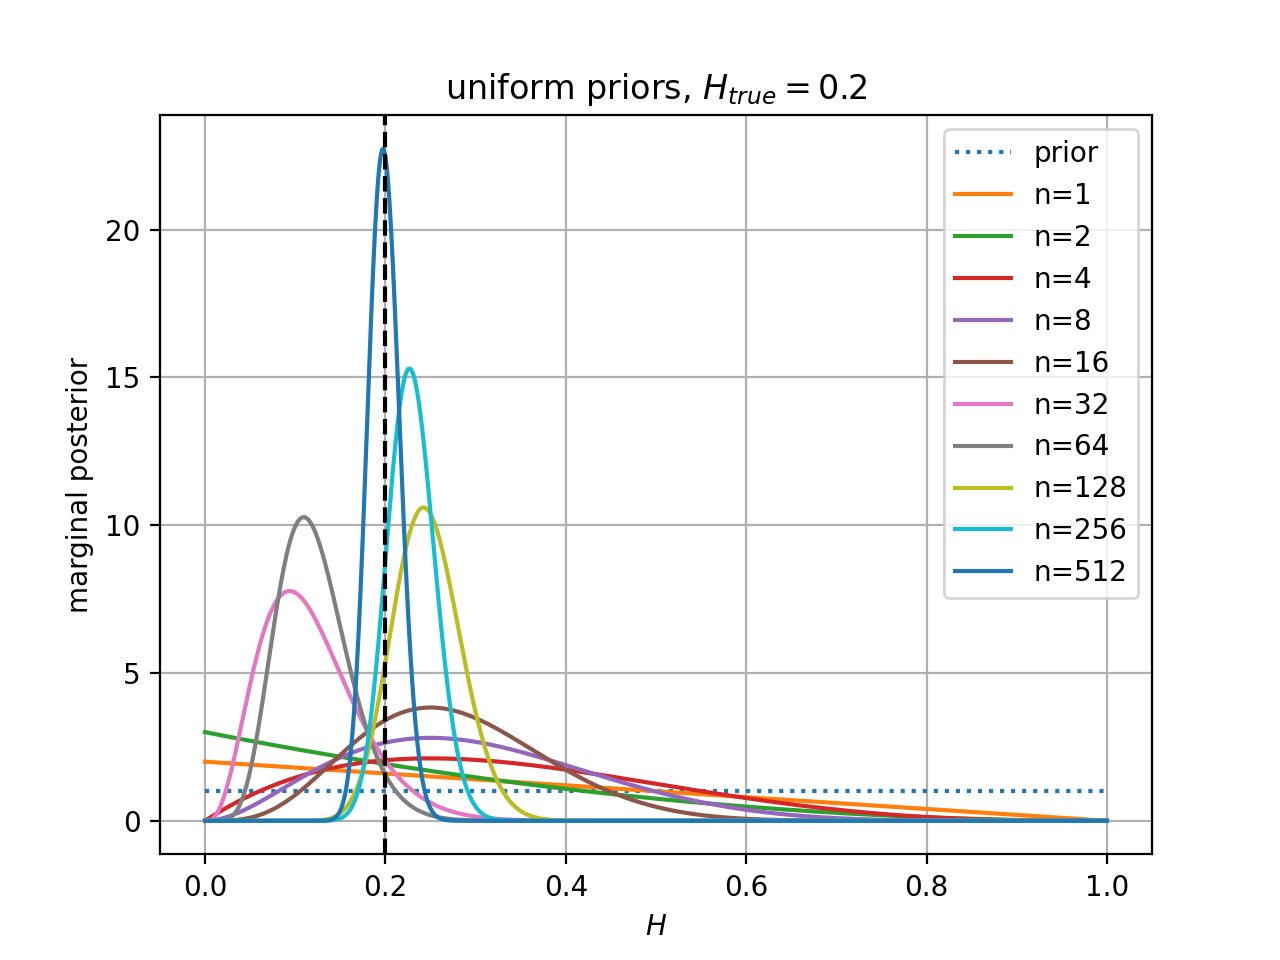

In [84]:
%matplotlib notebook
pl.plot(Hseq, prior, label = "prior", linestyle = ":")
n = 1
Htrue = 0.2
while n <= 512:

    trials = tossNCoins(Htrue, n)

    for i, H in enumerate(Hseq):
        posterior[i] = pDgivenH(trials, H) * prior[i]

    posterior /= (sum(posterior) * dH) # normalize
    
    pl.plot(Hseq, posterior, label = f"n={n}")
    n *= 2
    
pl.grid()
pl.legend()
pl.xlabel(r"$H$")
pl.ylabel(r"marginal posterior")
pl.title(r"uniform priors, $H_{true} = 0.2$")
pl.axvline(x = Htrue, linestyle = "--", color = "black")

# Gaussian Prior

In [85]:
def gaussian(x, mean, sd):
    return np.exp(-(x - mean) ** 2 / (2 * sd ** 2))

In [86]:
gridSize = 1000
dH = 1 / gridSize

meanH, sdH = 0.5, 0.1

Hseq = np.linspace(0, 1, gridSize)
prior = gaussian(Hseq, meanH, sdH) # gaussian prior
prior /= (sum(prior) * dH) # normalize
posterior = np.zeros_like(Hseq)

<IPython.core.display.Javascript object>


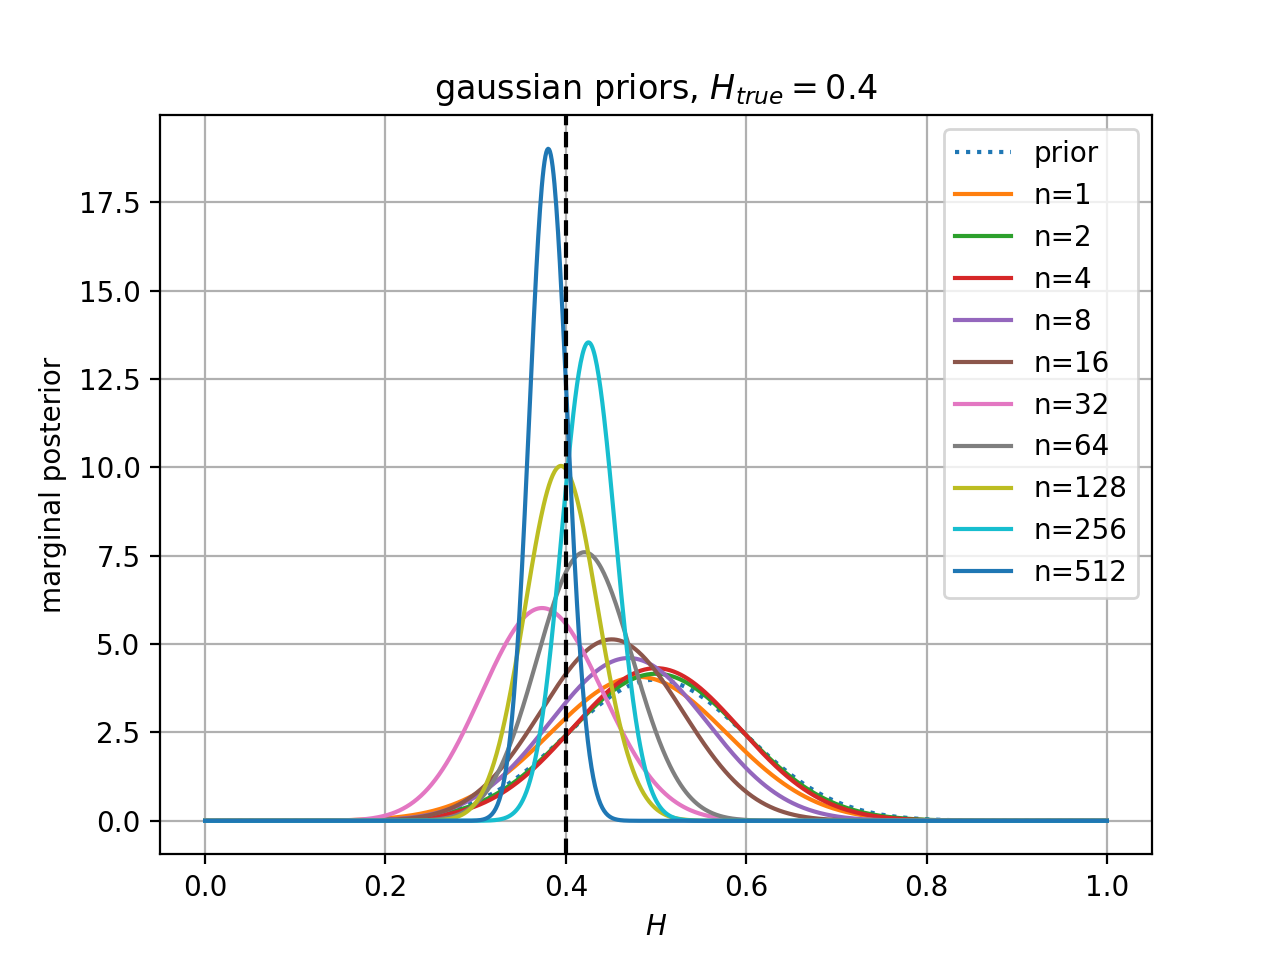

In [87]:
%matplotlib notebook
pl.plot(Hseq, prior, label = "prior", linestyle = ":")
n = 1
Htrue = 0.4
while n <= 512:

    trials = tossNCoins(Htrue, n)

    for i, H in enumerate(Hseq):
        posterior[i] = pDgivenH(trials, H) * prior[i]

    posterior /= (sum(posterior) * dH) # normalize
    
    pl.plot(Hseq, posterior, label = f"n={n}")
    n *= 2
    
pl.grid()
pl.legend()
pl.xlabel(r"$H$")
pl.ylabel(r"marginal posterior")
pl.title(r"gaussian priors, $H_{true} = 0.4$")
pl.axvline(x = Htrue, linestyle = "--", color = "black")

<IPython.core.display.Javascript object>


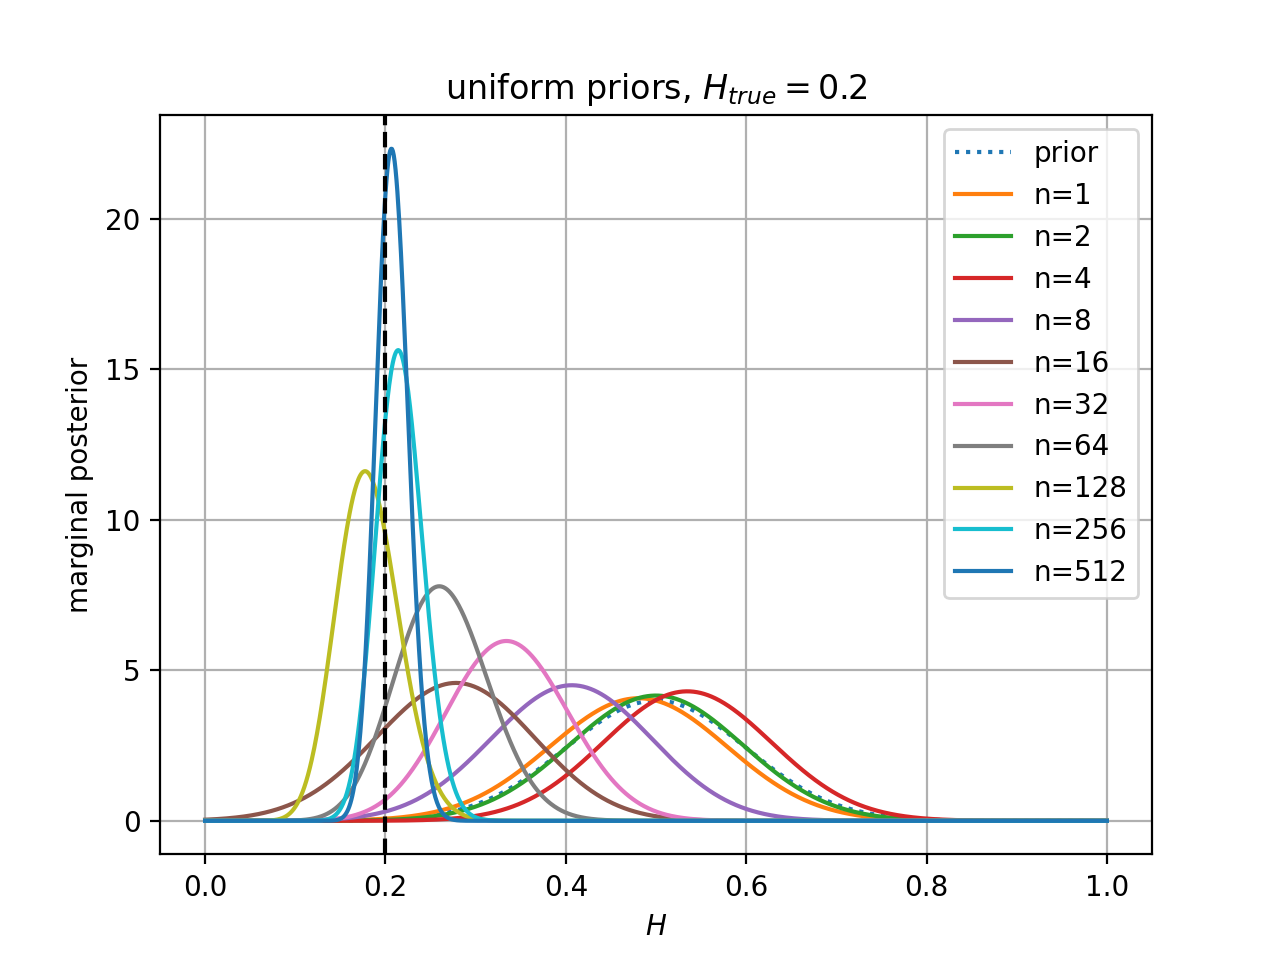

In [89]:
%matplotlib notebook
pl.plot(Hseq, prior, label = "prior", linestyle = ":")
n = 1
Htrue = 0.2
while n <= 512:

    trials = tossNCoins(Htrue, n)

    for i, H in enumerate(Hseq):
        posterior[i] = pDgivenH(trials, H) * prior[i]

    posterior /= (sum(posterior) * dH) # normalize
    
    pl.plot(Hseq, posterior, label = f"n={n}")
    n *= 2
    
pl.grid()
pl.legend()
pl.xlabel(r"$H$")
pl.ylabel(r"marginal posterior")
pl.title(r"uniform priors, $H_{true} = 0.2$")
pl.axvline(x = Htrue, linestyle = "--", color = "black")